<a href="https://colab.research.google.com/github/KevinCantrell/fluorescence/blob/main/QuantumYield.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

I added a row (#8) to the 1H sheet with "y" as the entry indicating to use the data in calculation of quantum yield.  All the compounds will need this in the "Quantum Yield" sheet.

It would be good to also add the $\lambda_{max}$ and absorbance of that concentration solution to the "Quantum Yield" header as well. (working on that for 1H in the code block below)

We need those to make the plot (#4 in the procedure) an get the dependence of the integrated intensity on absorbance.

The slope of those plots will be fine for comparison to other compounds in your set.  But to publish or compare with other phospors we'll need to do the same procudure for quinine.

8.67 uM 1Cl Ex @367 nm gives 23909500.0
4.78 uM 1Cl Ex @367 nm gives 13228360.0
3.47 uM 1Cl Ex @367 nm gives 7362465.0
10.47 uM 1H Ex @343 nm gives 24128160.0
4.19 uM 1H Ex @343 nm gives 9129465.0
2.09 uM 1H Ex @343 nm gives 4624660.0
8.64 uM 1Br Ex @368 nm gives 1660195.0
6.91 uM 1Br Ex @368 nm gives 1221945.0
5.18 uM 1Br Ex @368 nm gives 939920.0
3.46 uM 1Br Ex @368 nm gives 647550.0
1.73 uM 1Br Ex @368 nm gives 356430.0
11.3 uM 3 Cl Ex @358 nm gives 4975325.0
9.04 uM 3 Cl Ex @358 nm gives 3537580.0
6.78 uM 3 Cl Ex @358 nm gives 2650690.0
4.52 uM 3 Cl Ex @358 nm gives 1943020.0
2.26 uM 3 Cl Ex @358 nm gives 1013815.0


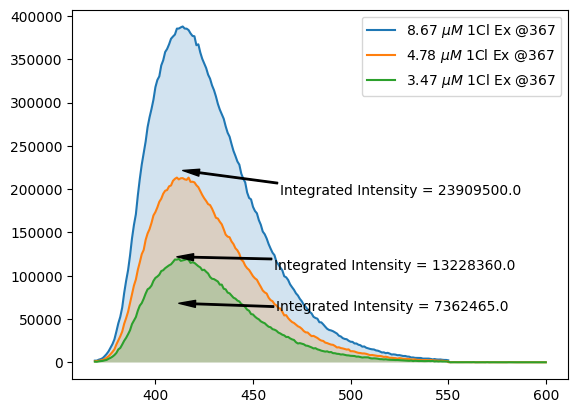

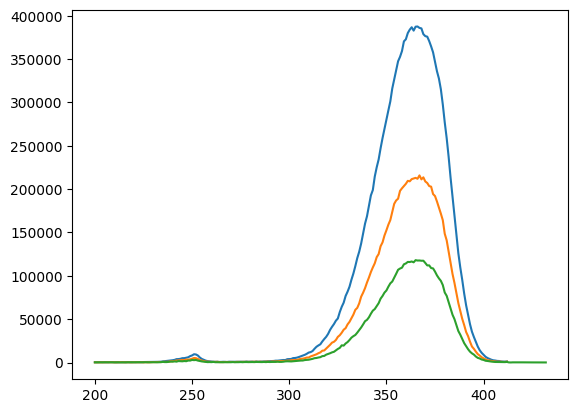

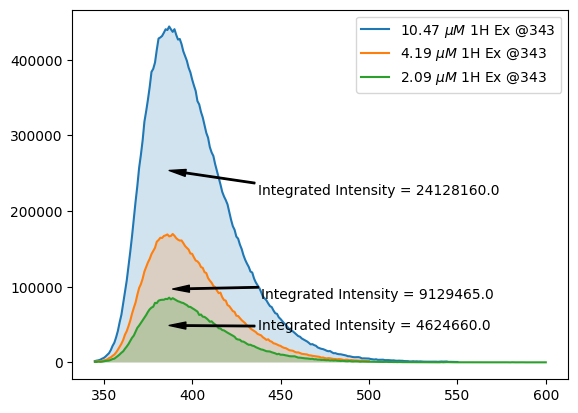

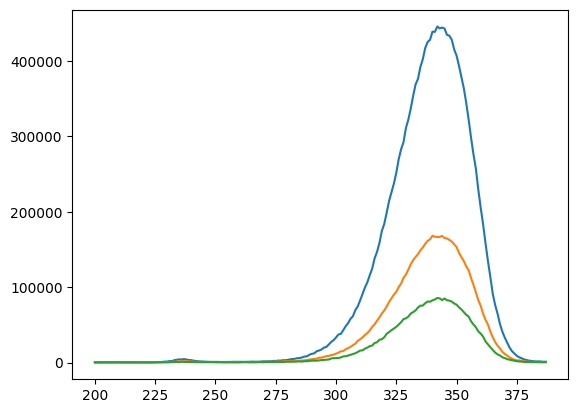

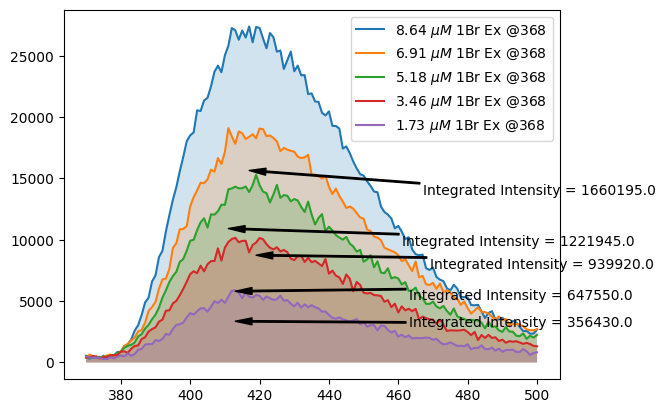

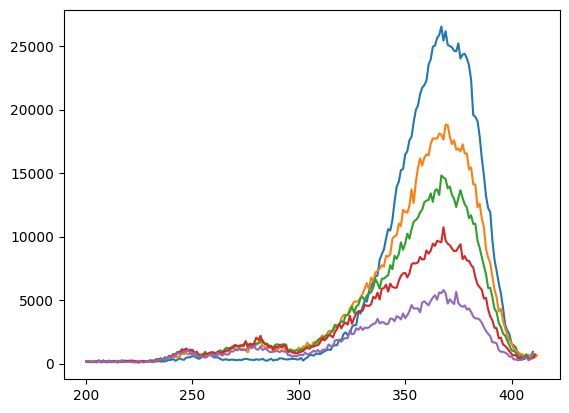

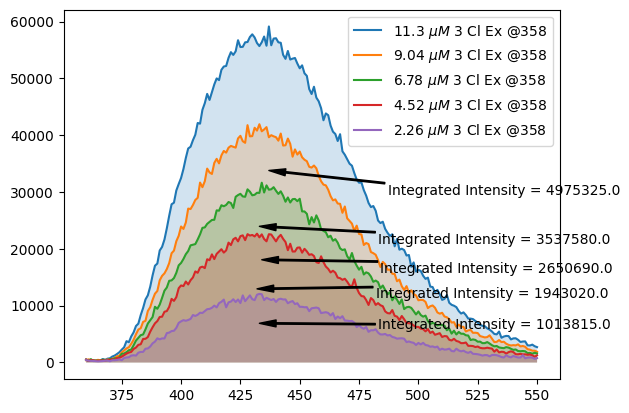

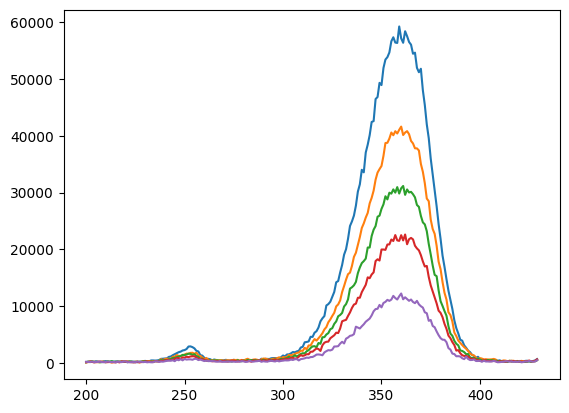

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import integrate

headerRows=9
#compoundList=["1Cl","1H","1Br","2Cl","2 F","3 Cl","3 F"]
compoundList=["1Cl","1H","1Br","3 Cl"]
fluorConcSummary=[]
fluorIntegSummary=[]
for compound,index in zip(compoundList,range(len(compoundList))):
  dfHeader=pd.read_excel("Quantum Yield.xlsx", sheet_name=compound,nrows=headerRows,header=None)
  dataBlockIndexes=np.arange(0,dfHeader.shape[1],5)
  fig,axEm=plt.subplots()
  fig,axEx=plt.subplots()
  lstIntegFluor=[]
  lstConcFluor=[]
  for blockIndex in reversed(dataBlockIndexes):
      dfRaw=pd.read_excel("Quantum Yield.xlsx", sheet_name=compound,skiprows=headerRows,usecols=[blockIndex,blockIndex+1,blockIndex+2,blockIndex+3])
      if dfHeader.iloc[7,blockIndex+1]=="y":
          conc=dfHeader.iloc[6,blockIndex+1]
          if dfHeader.iloc[1,blockIndex+1]!="Scan": #excitation wavelength
              waveEx=dfHeader.iloc[1,blockIndex+1]
              emissionScanWave=dfRaw.iloc[:,0].dropna()
              emissionScanInten=dfRaw.iloc[:,1].dropna()
              axEm.plot(emissionScanWave,emissionScanInten,label=str(conc)+r" $\mu M$ "+compound+" Ex @"+str(waveEx))
              totalIntensity=integrate.trapezoid(emissionScanInten,x=emissionScanWave)
              lstConcFluor.append(conc)
              lstIntegFluor.append(totalIntensity)
              print(str(conc)+" uM "+compound+" Ex @"+str(waveEx)+" nm gives "+str(totalIntensity))
              axEm.fill_between(emissionScanWave, emissionScanInten,alpha=0.2)
              lambdaMax=emissionScanWave[np.argmax(emissionScanInten)]
              axEm.annotate("Integrated Intensity = "+str(totalIntensity),xy=(lambdaMax,np.max(emissionScanInten)/1.75),xytext=(lambdaMax+50,np.max(emissionScanInten)/2),arrowprops={'color': "black", 'width':1, 'headwidth':5})
              #annotate(text, xy, xytext=None, xycoords='data', textcoords=None, arrowprops=None, annotation_clip=None, **kwargs)
              axEm.legend()
              waveEm=dfHeader.iloc[2,blockIndex+2]
              excitationScanWave=dfRaw.iloc[:,2].dropna()
              excitationScanInten=dfRaw.iloc[:,3].dropna()
              axEx.plot(excitationScanWave,excitationScanInten,label=str(conc)+r" $\mu M$ "+compound+" Em @"+str(waveEm))
  fluorConcSummary.append(lstConcFluor)
  fluorIntegSummary.append(lstIntegFluor)


In the future you should scan down to 200 nm for absorbance

Used a 51 point, 7th order Savitsky Golay smooth.

These need baseline adjustment (make the average absorbance between 525 to 575 nm equal to 0)

Should be able to specify excitation wavelength used in fluorescence (instead of finding the max)

In [ ]:
print(fluorConcSummary)
print(fluorIntegSummary)

[[8.67, 4.78, 3.47], [10.47, 4.19, 2.09], [8.64, 6.91, 5.18, 3.46, 1.73], [11.3, 9.04, 6.78, 4.52, 2.26]]
[[np.float64(23909500.0), np.float64(13228360.0), np.float64(7362465.0)], [np.float64(24128160.0), np.float64(9129465.0), np.float64(4624660.0)], [np.float64(1660195.0), np.float64(1221945.0), np.float64(939920.0), np.float64(647550.0), np.float64(356430.0)], [np.float64(4975325.0), np.float64(3537580.0), np.float64(2650690.0), np.float64(1943020.0), np.float64(1013815.0)]]


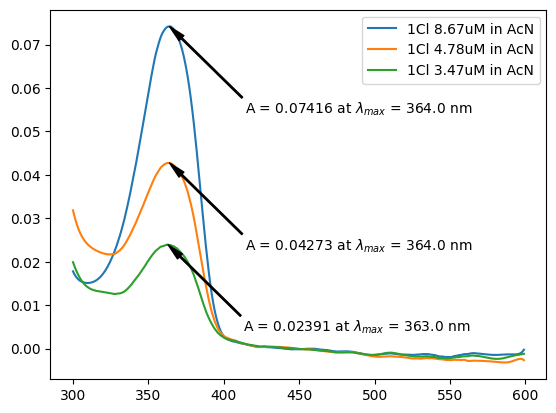

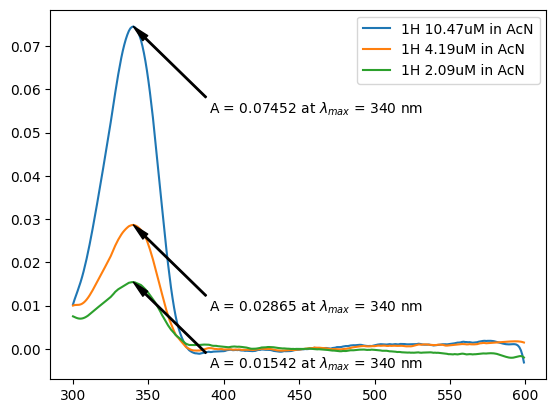

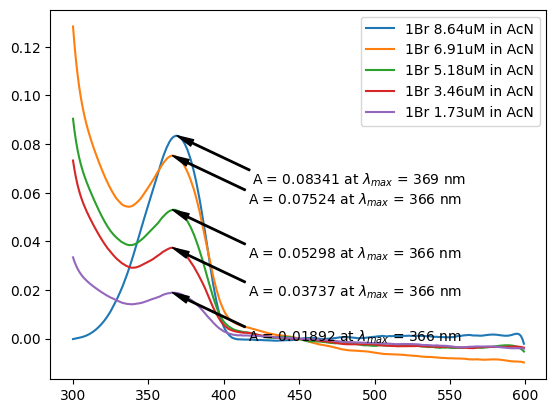

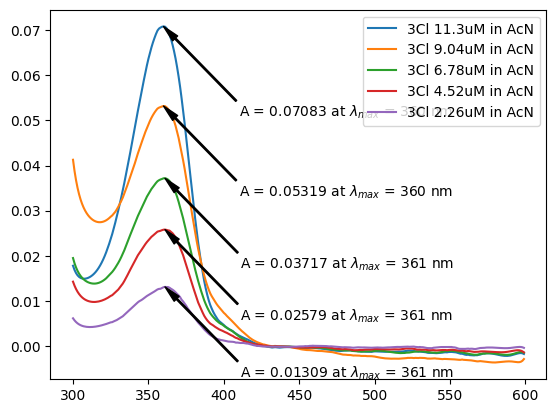

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import integrate
from scipy.signal import savgol_filter

#compoundList=["1Cl","1H","1Br","3 Cl"]
compoundList=["1-Cl, 3-10uM.xlsx","1-H, 2-10uM.xlsx","1-Br, 2-10uM.xlsx","3-Cl, 2-11uM.xlsx"]
absConcSummary=[]
absSummary=[]

for absorbanceFile in compoundList:
  headerRows=4
  dfHeader=pd.read_excel(absorbanceFile, sheet_name="in",nrows=headerRows,header=None)
  dataBlockIndexes=np.arange(0,dfHeader.shape[1],3)
  lstConc=[]
  lstAbs=[]
  fig,axAbs=plt.subplots()
  for blockIndex in reversed(dataBlockIndexes):
      dfRaw=pd.read_excel(absorbanceFile, sheet_name="in",skiprows=headerRows,usecols=[blockIndex,blockIndex+1])
      if dfHeader.iloc[2,blockIndex]=="y":
          sampleName=dfHeader.iloc[0,blockIndex]
          conc=dfHeader.iloc[1,blockIndex]
          absorbanceWave=dfRaw.iloc[:,0].dropna()
          absorbance=dfRaw.iloc[:,1].dropna()
          #may need to smooth first
          absorbance=savgol_filter(absorbance, 51, 7)
          baseline=np.mean(absorbance[(absorbanceWave<500) & (absorbanceWave>400)])
          absorbance=absorbance-baseline
          axAbs.plot(absorbanceWave,absorbance,label=sampleName)
          absMax=np.max(absorbance[(absorbanceWave>325)])
          lambdaMax=absorbanceWave[np.argmax(absorbance[(absorbanceWave>325)])]
          axAbs.annotate("A = {0:1.5f}".format(absMax)+" at $\lambda_{max}$ = "+str(lambdaMax)+" nm",xy=(lambdaMax,absMax),xytext=(lambdaMax+50,absMax-.02),arrowprops={'color': "black", 'width':1, 'headwidth':5})
              #annotate(text, xy, xytext=None, xycoords='data', textcoords=None, arrowprops=None, annotation_clip=None, **kwargs)
          axAbs.legend()
          lstConc.append(conc)
          lstAbs.append(absMax)
  absConcSummary.append(lstConc)
  absSummary.append(lstAbs)


[[8.67, 4.78, 3.47], [10.47, 4.19, 2.09], [8.64, 6.91, 5.18, 3.46, 1.73], [11.3, 9.04, 6.78, 4.52, 2.26]]
[[np.float64(0.07416074925622718), np.float64(0.04273376032709423), np.float64(0.0239087401063423)], [np.float64(0.07452277434558408), np.float64(0.028650051960508995), np.float64(0.015416393817586468)], [np.float64(0.08341468754876208), np.float64(0.07524399158687965), np.float64(0.05297882403884348), np.float64(0.03737124299287216), np.float64(0.01892011260116259)], [np.float64(0.0708280966423825), np.float64(0.05318842485329593), np.float64(0.03716908713415486), np.float64(0.02579345831891299), np.float64(0.013092140968784497)]]
[[8.67, 4.78, 3.47], [10.47, 4.19, 2.09], [8.64, 6.91, 5.18, 3.46, 1.73], [11.3, 9.04, 6.78, 4.52, 2.26]]
[[np.float64(23909500.0), np.float64(13228360.0), np.float64(7362465.0)], [np.float64(24128160.0), np.float64(9129465.0), np.float64(4624660.0)], [np.float64(1660195.0), np.float64(1221945.0), np.float64(939920.0), np.float64(647550.0), np.float64(35

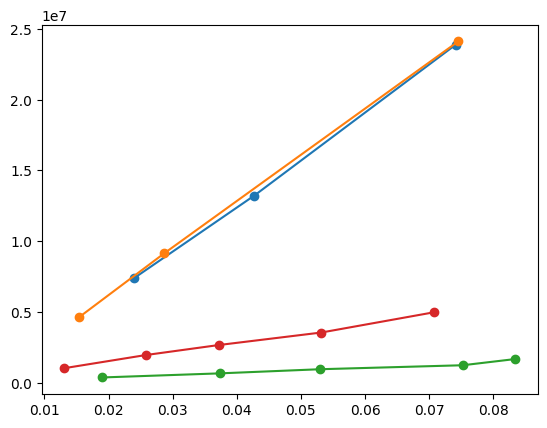

In [ ]:
print(absConcSummary)
print(absSummary)
print(fluorConcSummary)
print(fluorIntegSummary)

#fig,ax=plt.subplots()
#ax.plot(lstAbs,lstIntegFluor,'ok')
compoundList=["1Cl","1H","1Br","3 Cl"]
fig,ax=plt.subplots()
for compound,fluor,abs,conc in zip(compoundList,fluorIntegSummary,absSummary,fluorConcSummary):
  ax.plot(abs,fluor,"-o",label=compound)



{'coefs': array([ 3.30365614e+08, -6.72075667e+05]), 'errors': array([7490752.71944558,  384337.6395396 ]), 'sy': np.float64(268948.3262340471), 'n': 3, 'poly': poly1d([ 3.30365614e+08, -6.72075667e+05]), 'res': array([  81414.22341422, -217329.29112251,  135915.06770827])}
{'coefs': array([ 3.29192295e+08, -3.85457525e+05]), 'errors': array([2448232.99938342,  114937.82166567]), 'sy': np.float64(107397.19061181752), 'n': 3, 'poly': poly1d([ 3.29192295e+08, -3.85457525e+05]), 'res': array([-18705.61673277,  83546.15849051, -64840.54175774])}
{'coefs': array([18613333.59644129,   -32201.84567445]), 'errors': array([2246253.0778733 ,  131673.37290197]), 'sy': np.float64(119365.26204036397), 'n': 5, 'poly': poly1d([18613333.59644129,   -32201.84567445]), 'res': array([ 139771.43948643, -146394.67085996,  -13990.6797077 ,
        -15851.56706555,   36465.47814678])}
{'coefs': array([66780794.70304654,   151903.14761377]), 'errors': array([2593272.57743217,  116344.48275252]), 'sy': np.floa

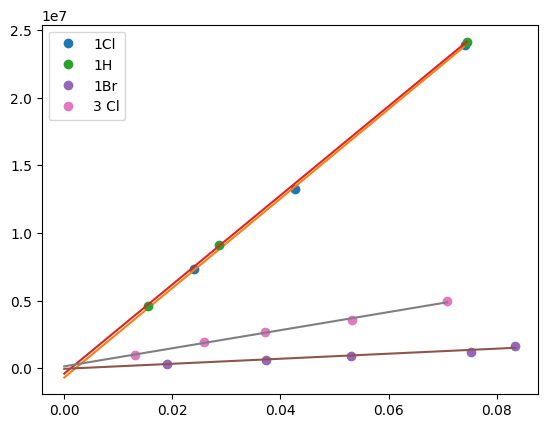

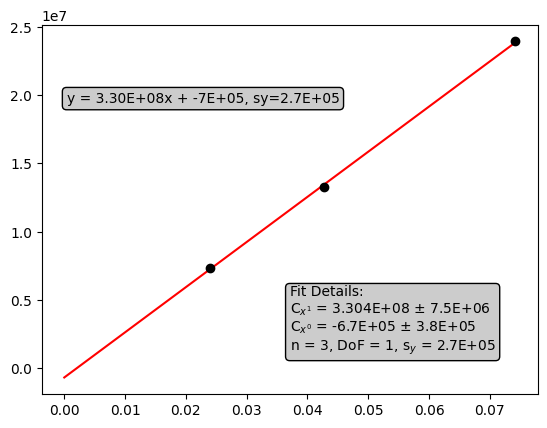

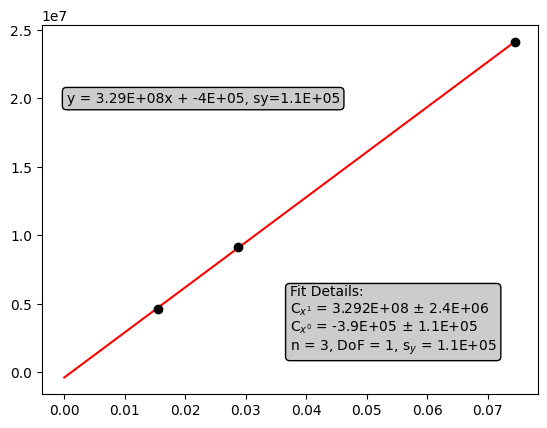

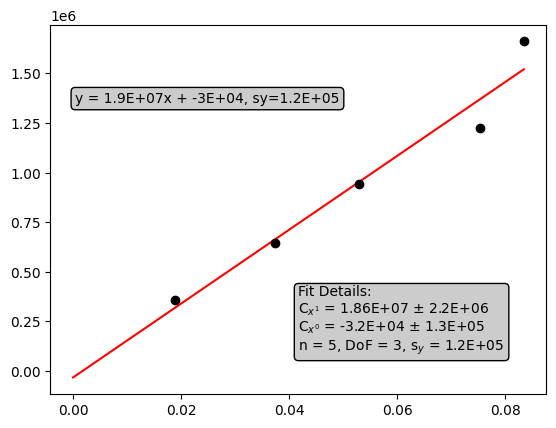

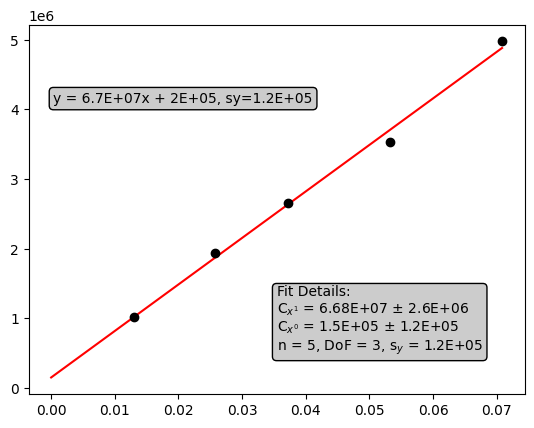

In [ ]:
def FormatSciUsingError(x,e,WithError=False,ExtraDigit=0):
  """
  Format the value, x, as a string using scientific notation and rounding appropriately based on the absolute error, e

  Parameters
  ----------
      x: number
          the value to be formatted
      e: number
          the absolute error of the value
      withError: bool, optional
          When False (the default) returns a string with only the value. When True returns a string containing the value and the error
      extraDigit: int, optional
          number of extra digits to return in both value and error

  Returns
  -------
  a string

  Examples
  --------
  >>> FormatSciUsingError(3.141592653589793,0.02718281828459045)
  '3.14E+00'
  >>> FormatSciUsingError(3.141592653589793,0.002718281828459045)
  '3.142E+00'
  >>> FormatSciUsingError(3.141592653589793,0.002718281828459045,withError=True)
  '3.142E+00 (+/- 3E-03)'
  >>> FormatSciUsingError(3.141592653589793,0.002718281828459045,withError=True,extraDigit=1)
  '3.1416E+00 (+/- 2.7E-03)'
  >>> FormatSciUsingError(123456,123,withError=True)
  '1.235E+05 (+/- 1E+02)'
  """
  if np.abs(x)>=e:
      NonZeroErrorX=np.floor(np.log10(np.abs(e)))
      NonZeroX=np.floor(np.log10(np.abs(x)))
      formatCodeX="{0:."+str(int(NonZeroX-NonZeroErrorX+ExtraDigit))+"E}"
      formatCodeE="{0:."+str(ExtraDigit)+"E}"
  else:
      formatCodeX="{0:."+str(ExtraDigit)+"E}"
      formatCodeE="{0:."+str(ExtraDigit)+"E}"
  if WithError==True:
      return formatCodeX.format(x)+" (+/- "+formatCodeE.format(e)+")"
  else:
      return formatCodeX.format(x)

def PolyReg(X,Y,order=1):
  """
  Perform a least squares polynomial fit

  Parameters
  ----------
      X: a numpy array with shape M
          the independent variable
      Y: a numpy array with shape M
          the dependent variable
      order: integer
          the degree of the fitting polynomial

  Returns
  -------{0:1.5f}'.format(3.141592)
  a dict with the following keys:
      'coefs': a numpy array with length order+1
          the coefficients of the fitting polynomial, higest order term first
      'errors': a numpy array with length order+1
          the standard errors of the calculated coefficients,
          only returned if (M-order)>2
      'sy': float
          the standard error of the fit
      'n': integer
          number of data points (M)
      'poly':  class in numpy.lib.polynomial module
          a polynomial with coefficients (coefs) and degreee (order),
          see example below
      'res': a numpy array with length M
          the residuals of the fit

  Examples
  --------
  >>> x = np.array([0.0, 1.0, 2.0, 3.0,  4.0,  5.0])
  >>> y = np.array([0.0, 0.8, 0.9, 0.1, -0.8, -1.0])
  >>> fit = PolyReg(x, y, 2)
  >>> fit
  {'coefs': array([-0.16071429,  0.50071429,  0.22142857]),
    'errors': array([0.06882765, 0.35852091, 0.38115025]),
    'n': 6,
    'poly': poly1d([-0.16071429,  0.50071429,  0.22142857]),
    'res': array([-0.22142857,  0.23857143,  0.32      , -0.17714286, -0.45285714,
        0.29285714]),
    'sy': 0.4205438655564278}

  It is convenient to use the "poly" key for dealing with fit polynomials:

  >>> fit['poly'](0.5)
  0.43160714285714374
  >>> fit['poly'](10)
  -10.842857142857126
  >>> fit['poly'](np.linspace(0,10,11))
  array([  0.22142857,   0.56142857,   0.58      ,   0.27714286,
      -0.34714286,  -1.29285714,  -2.56      ,  -4.14857143,
      -6.05857143,  -8.29      , -10.84285714])
  """
  n=len(X)
  df=n-(order+1)
  if df==0:
    coefs=np.polyfit(X,Y,order)
    errors=np.zeros(coefs.shape)
  else:
    coefs,cov=np.polyfit(X,Y,order,cov=True)
    errors=np.sqrt(np.diagonal(cov))
  poly=np.poly1d(coefs)
  Yfit=poly(X)
  res=Y-Yfit
  if df==0:
    sy=0
  else:
    sy=np.sqrt( np.sum(res**2) / df )
  return {'coefs':coefs,'errors':errors,'sy':sy,'n':n,'poly':poly,'res':res}

def AnnotateFit(fit,axisHandle,annotationText='Eq',color='black',Arrow=False,xArrow=0,yArrow=0,xText=0.5,yText=0.2):
  """
  Annotate a figure with information about a PolyReg() fit

  see https://matplotlib.org/api/_as_gen/matplotlib.pyplot.annotate.html
  https://matplotlib.org/examples/pylab_examples/annotation_demo3.html

  Parameters
  ----------
      fit: dict, returned by the function PolyReg(X,Y,order)
          the fit to be summarized in the figure annotation
      axisHandle: a matplotlib axes class
          the axis handle to the figure to be annotated
      annotationText: string, optional
          When "Eq" (the default) displays a formatted polynomial with the coefficients (rounded according to their error) in the fit. When "Box" displays a formatted box with the coefficients and their error terms.  When any other string displays a text box with that string.
      color: a valid color specification in matplotlib, optional
          The color of the box outline and connecting arrow.  Default is black. See https://matplotlib.org/users/colors.html
      arrow: bool, optional
          If True (default=False) draws a connecting arrow from the annotation to a point on the graph.
      xArrow: float, optional
          The X coordinate of the arrow head using units of the figure's X-axis data. If unspecified or 0 (and arrow=True), defaults to the center of the X-axis.
      yArrow: float, optional
          The Y coordinate of the arrow head using units of the figure's Y-axis data. If unspecified or 0 (and arrow=True), defaults to the calculated Y-value at the center of the X-axis.
      xText: float, optional
          The X coordinate of the annotation text using the fraction of the X-axis (0=left,1=right). If unspecified, defults to the center of the X-axis.
      yText: float, optional
          The Y coordinate of the annotation text using the fraction of the Y-axis (0=bottom,1=top). If unspecified, defults to 20% above the bottom.

  Returns
  -------
  a dragable matplotlib Annotation class

  Examples
  --------
  >>> annLinear=AnnotateFit(fitLinear,ax)
  >>> annLinear.remove()
  """
  c=fit['coefs']
  e=fit['errors']
  t=len(c)
  if annotationText=='Eq':
      annotationText="y = "
      for order in range(t):
          exponent=t-order-1
          if exponent>=2:
              annotationText=annotationText+FormatSciUsingError(c[order],e[order])+"x$^{}$".format(exponent)+" + "
          elif exponent==1:
              annotationText=annotationText+FormatSciUsingError(c[order],e[order])+"x + "
          else:
              annotationText=annotationText+FormatSciUsingError(c[order],e[order])
      annotationText=annotationText+", sy={0:.1E}".format(fit['sy'])
  elif annotationText=='Box':
      annotationText="Fit Details:\n"
      for order in range(t):
          exponent=t-order-1
          annotationText=annotationText+"C$_{x^{"+str(exponent)+"}}$ = "+FormatSciUsingError(c[order],e[order],ExtraDigit=1)+r' $\pm$ '+"{0:.1E}".format(e[order])+'\n'
      annotationText=annotationText+'n = {0:d}'.format(fit['n'])+', DoF = {0:d}'.format(fit['n']-t)+", s$_y$ = {0:.1E}".format(fit['sy'])
  if (Arrow==True):
      if (xArrow==0):
          xSpan=axisHandle.get_xlim()
          xArrow=np.mean(xSpan)
      if (yArrow==0):
          yArrow=fit['poly'](xArrow)
      annotationObject=axisHandle.annotate(annotationText,
              xy=(xArrow, yArrow), xycoords='data',
              xytext=(xText, yText),  textcoords='axes fraction',
              arrowprops={'color': color, 'width':1, 'headwidth':5},
              bbox={'boxstyle':'round', 'edgecolor':color,'facecolor':'0.8'}
              )
  else:
      xSpan=axisHandle.get_xlim()
      xArrow=np.mean(xSpan)
      ySpan=axisHandle.get_ylim()
      yArrow=np.mean(ySpan)
      annotationObject=axisHandle.annotate(annotationText,
              xy=(xArrow, yArrow), xycoords='data',
              xytext=(xText, yText),  textcoords='axes fraction',
              ha="left", va="center",
              bbox={'boxstyle':'round', 'edgecolor':color,'facecolor':'0.8'}
              )
  annotationObject.draggable()
  return annotationObject


compoundList=["1Cl","1H","1Br","3 Cl"]
fig,ax=plt.subplots()
for compound,fluor,abs,conc in zip(compoundList,fluorIntegSummary,absSummary,fluorConcSummary):
  ax.plot(abs,fluor,"o",label=compound)
  fit=PolyReg(abs,fluor,order=1)
  print(fit)
  fig,axQY=plt.subplots()
  xFit=np.linspace(0,np.max(abs),2)
  axQY.plot(xFit,fit['poly'](xFit),'-r')
  axQY.plot(abs,fluor,'ok')
  ax.plot(xFit,fit['poly'](xFit))
  AnnotateFit(fit,axQY,annotationText='Box',color='black',Arrow=False,xArrow=0,yArrow=0,xText=0.5,yText=0.2)
  AnnotateFit(fit,axQY,annotationText='Eq',color='black',Arrow=False,xArrow=0,yArrow=0,xText=0.05,yText=0.8)
ax.legend()